⼩结    
• 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本⾝。    
• ⽮量化使数学表达上更简洁，同时运⾏的更快。      
• 最小化⽬标函数和执⾏极⼤似然估计等价。   
• 线性回归模型也是⼀个简单的神经⽹络。

练习
1. 假设我们有⼀些数据x1, . . . , xn ∈ R。我们的⽬标是找到⼀个常数b，使得最小化$∑_{i}(xi − b)^2$。
    1. 找到最优值b的解析解。
    2. 这个问题及其解与正态分布有什么关系?
2. 推导出使⽤平⽅误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置b（我们可以通过向X添加所有值为1的⼀列来做到这⼀点）。
    1. ⽤矩阵和向量表⽰法写出优化问题（将所有数据视为单个矩阵，将所有⽬标值视为单个向量）。
    2. 计算损失对w的梯度。
    3. 通过将梯度设为0、求解矩阵⽅程来找到解析解。
    4. 什么时候可能⽐使⽤随机梯度下降更好？这种⽅法何时会失效？
3. 假定控制附加噪声ϵ的噪声模型是指数分布。也就是说，p(ϵ) = 1/2exp(−|ϵ|)
    1. 写出模型− log P(y | X)下数据的负对数似然。
    2. 你能写出解析解吗？
    3. 提出⼀种随机梯度下降算法来解决这个问题。哪⾥可能出错？（提⽰：当我们不断更新参数时，在驻点附近会发⽣什么情况）你能解决这个问题吗

1. 
    1. $$ 
\begin{gathered}
\text { 即求 }\underset{b}{\operatorname{argmin}} \sum_{i=1}^{n}\left(x_{i}-b\right)^{2}
\Rightarrow \frac{\delta \sum_{i=1}^{n}\left(x_{i}-b\right)^{2}}{\delta b}=0 \\
\Rightarrow \sum_{i=1}^{n}\left(x_{i}-b\right)=0 \\
\Rightarrow \sum_{i=1}^{n} x_{i}-n b=0 \\
\Rightarrow b=\frac{\sum_{i=1}^{n} x_{i}}{n}
\end{gathered}
$$
    2. $$
\begin{gathered}
\text { 令 } x_{i}=b+\epsilon\left(\epsilon \sim N\left(0, \sigma^{2}\right)\right) \\
\text { 则 } P\left(x_{i} \mid b\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x^{i}-b\right)\right) \\
\text { 则 } P(x \mid b)=\prod_{i=1}^{n} p\left(x_{i} \mid b\right) \\
=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x^{i}-b\right)\right) \\
=\left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)^{n} \exp \left(\sum_{i=1}^{n}-\frac{1}{2 \sigma^{2}}\left(x^{i}-b\right)\right) \\
-\log (P(x \mid b))=\frac{n}{2} \log \left(2 \pi \sigma^{2}\right)+\sum_{i=1}^{n} \frac{1}{2 \sigma^{2}}\left(x^{i}-b\right) \\
\text { 则 } \operatorname{argmax} P(x \mid b) \Rightarrow \underset{b}{\operatorname{argmin}}-\log (P(x \mid b)) \\
\Rightarrow \operatorname{argmin} \sum_{i=1}^{n}\left(x_{i}-b\right)^{2}
\end{gathered}
$$

2. 
    1. $$
\begin{gathered}
\text { 令 } \hat{Y}=X W, \text { 标签表示为 } Y \\
\text { 其中 } X \in R^{1 \times n}, Y \in R^{1 \times q}, W \in R^{n \times q} \text {, 则 } \hat{Y} \in R^{1 \times q} \\
\text { 则 } L o s s=\|Y-\hat{Y}\|_{2}=(Y-X W)^{T}(Y-X W) \\
\end{gathered}
$$
    2. $$
\begin{gathered}    
\text { Loss }=(Y-X W)^{T}(Y-X W) \\
=Y^{T} Y-W^{T} X^{T} Y-Y^{T} X W+W^{T} X^{T} X W \\
=Y^{T} Y-2 Y^{T} X W+W^{T} X^{T} X W \\
\text { 则 } \frac{\delta L}{\delta W}=-2 X^{T} Y+2 X^{T} X W \\
\end{gathered}
$$
    3. $$
\begin{gathered}
\text { 令 } \frac{\delta L}{\delta W}=0, \text { 得 } W=\left(X^{T} X\right)^{-1} X^{T} Y
\end{gathered}
$$
    4. 当模型比较简单的时候, 通过求 $W$ 的解析解是比随机梯度下降更好, 但是当 $X^{T} X$ 不可逆时候这个方法失效

3. 
(1)
$$
\text { 令 } y=w^{T} x+b+\epsilon \text {, 其中 } p(\epsilon)=\frac{1}{2} e^{-|\epsilon|}
$$
则通过给定的 $x$ 观测到特定 $y$ 的似然 : $P(y \mid x)=\frac{1}{2} e^{-\left|y-w^{T} x-b\right|}$
$$
\begin{aligned}
\text { 则 } P(y \mid X) &=\prod_{i=1}^{n} p\left(y^{(i)} \mid x^{(i)}\right) \\
&=\prod_{i=1}^{n} \frac{1}{2} e^{-\left|y^{(i)}-w^{T} x^{(i)}-b\right|} \\
&=\left(\frac{1}{2}\right)^{n} e^{\left(-\sum_{i=1}^{n}\left|y^{(i)}-w^{T} x^{(i)}-b\right|\right)} \\
\text { 则 }-\log P(y \mid X) &=n \log 2+\sum_{i=1}^{n}\left|y^{(i)}-w^{T} x^{(i)}-b\right|
\end{aligned}
$$
(2)<br>
由(1)极大似然估计, 定义Loss $=\sum_{i=1}^{n}\left|y^{(i)}-w^{T} x^{(i)}-b\right|$
参考题 2 , 假设batchsize $=1$, 且将 $b$ 合并进 $x$ 中, 即求 $L o s s=|Y-X W|$
$$
\begin{gathered}
\text { 即 } L o s s=\operatorname{sgn}(Y-X W) \times(Y-X W) \\
\text { 则 } \frac{\delta L}{\delta W}=-\operatorname{sgn}(Y-X W) X^{T} \\
\text { 令 } \frac{\delta L}{\delta W}=0 \text {, 其实发现是没有解的, 其实也说的通, 这种线性绝对值函数在极点是没有导数的 }
\end{gathered}
$$
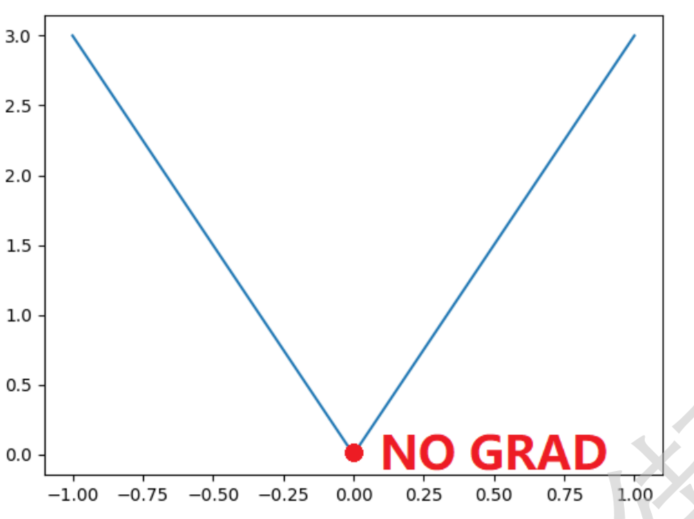
(3)<br>
所求得的损失函数其实是L1-loss的形式，在驻点处不可导，梯度下降法可能碰到问题(例如在驻点附近，参数剧烈波动难以收敛)，可以采用smooth L1-loss的方法来代替L1-loss会有比较好的效果(即当损失函数小于一定阈值后，就用L2-loss代替L1-loss，即避免了L2-1oss在距离驻点较远时梯度太大训练不稳定，也避免了L1-10ss在驻点附近参数剧烈波动难以收敛)。